In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [24]:
#for reading data from Yahoo Finance.
from pandas.io.data import DataReader

In [25]:
#for reading time stamps.
from datetime import datetime

In [26]:
from __future__ import division

In [27]:
#Barclays, HSBC, Lloyds and Royal Bank of Scotland respectively.
bank_list = ['BCS', 'HSBC', 'RBS']

#set up end and start times for the data extraction
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#For loop extracting yahoo finance data and setting as a dataframe.

for stock in bank_list:
    #set DataFrame as the stockticker
    globals()[stock] = DataReader(stock, 'yahoo',start,end)

In [28]:
#summary sttistics
BCS.describe()

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,11.367312,11.463755,11.233557,11.342885,5.775866e+06,11.113839
std,2.802900,2.808881,2.787821,2.794456,1.147938e+07,2.635440
min,7.030000,7.080000,6.760000,7.030000,8.551000e+05,6.986063
25%,9.220000,9.290000,9.010000,9.200000,2.659200e+06,8.977037
50%,10.410000,10.490000,10.250000,10.370000,3.533600e+06,10.136250
75%,13.890000,14.010000,13.760000,13.920000,5.271700e+06,13.553183
max,16.900000,16.920000,16.680000,16.730000,1.496358e+08,16.220466


In [29]:
#general information
BCS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-08-19 to 2016-08-18
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


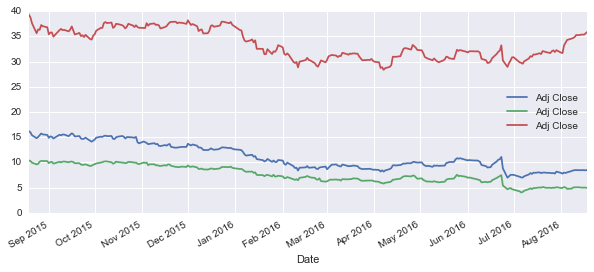

In [34]:
#historical view of the closing price of stocks
BCS['Adj Close'].plot(legend=True,figsize=(10,4))
RBS['Adj Close'].plot(legend=True,figsize=(10,4))
HSBC['Adj Close'].plot(legend=True,figsize=(10,4))

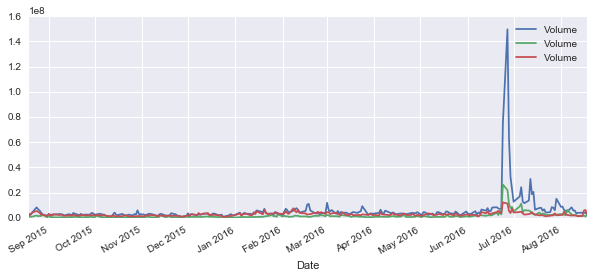

In [36]:
#total volume of stock being traded everyday for the previous five years
BCS['Volume'].plot(legend=True,figsize=(10,4))
RBS['Volume'].plot(legend=True,figsize=(10,4))
HSBC['Volume'].plot(legend=True,figsize=(10,4))

In [38]:
#Calc moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    BCS[column_name]=pd.rolling_mean(BCS['Adj Close'],ma)
    RBS[column_name]=pd.rolling_mean(RBS['Adj Close'],ma)
    HSBC[column_name]=pd.rolling_mean(HSBC['Adj Close'],ma)

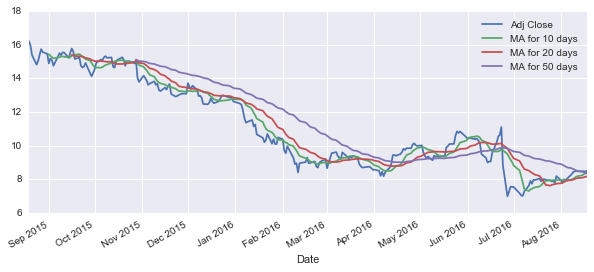

In [39]:
BCS[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

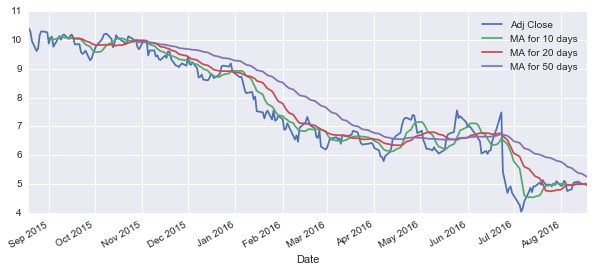

In [40]:
RBS[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

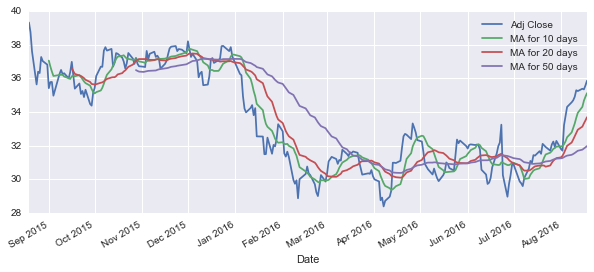

In [41]:
HSBC[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

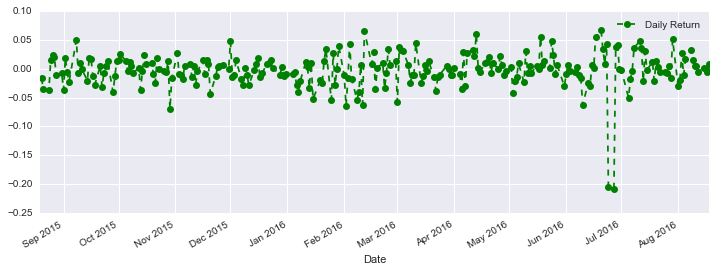

In [57]:
#using pct_change to find the daily % change for Barclays
BCS['Daily Return'] = BCS['Adj Close'].pct_change()
#Visualization of the daily percentage change
BCS['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o',color='green')

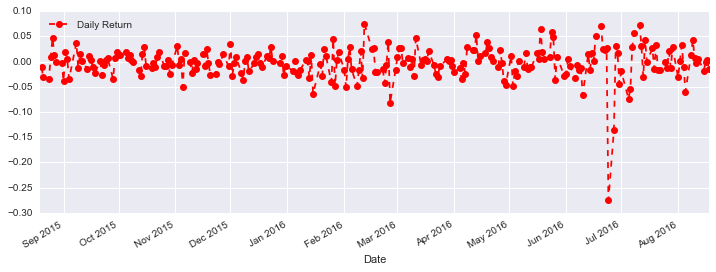

In [56]:
#using pct_change to find the daily % change for RBS
RBS['Daily Return'] = RBS['Adj Close'].pct_change()
#Visualization of the daily percentage change
RBS['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o',color='red')

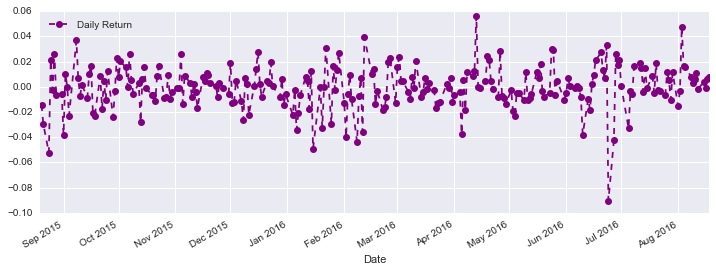

In [55]:
#using pct_change to find the daily % change
HSBC['Daily Return'] = HSBC['Adj Close'].pct_change()
#Visualization of the daily percentage change
HSBC['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o',color='purple')

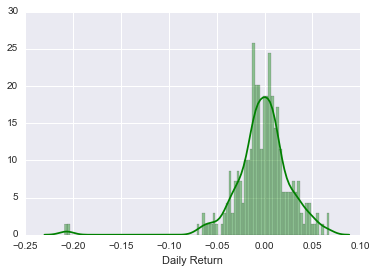

In [49]:
sns.distplot(BCS['Daily Return'].dropna(),bins=100,color='green')

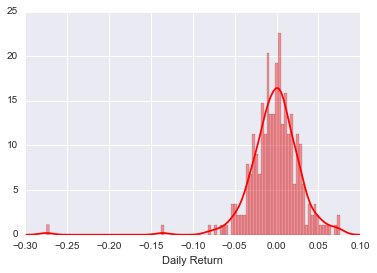

In [50]:
sns.distplot(RBS['Daily Return'].dropna(),bins=100,color='red')

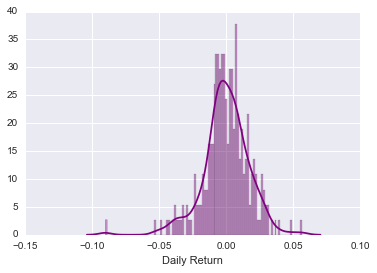

In [52]:
sns.distplot(HSBC['Daily Return'].dropna(),bins=100,color='purple')

In [58]:
#collecting all the closing prices for banking stock into one DataFrame
closing_df = DataReader(['BCS','RBS','HSBC'],'yahoo',start,end)['Adj Close']

In [59]:
closing_df.head()

,BCS,HSBC,RBS
Date,,,
2015-08-19,16.220466,39.330230,10.40
2015-08-20,15.958688,38.763993,10.28
2015-08-21,15.396354,37.612957,9.96
2015-08-24,14.824323,35.645054,9.62
2015-08-25,15.047319,36.406224,9.71


In [60]:
#banking returns DataFrame
banking_rets = closing_df.pct_change()

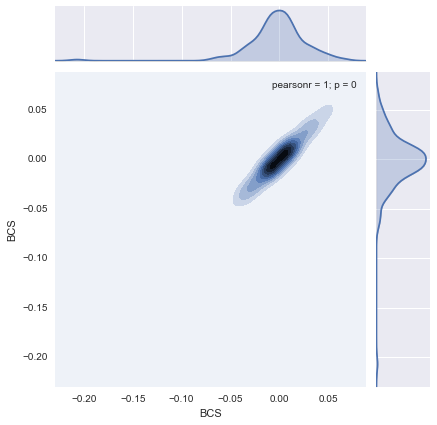

In [78]:
#comparing Barclays stock to itself should show a perfectly linear relationship
sns.jointplot('BCS','BCS',banking_rets,kind='kdeplot')

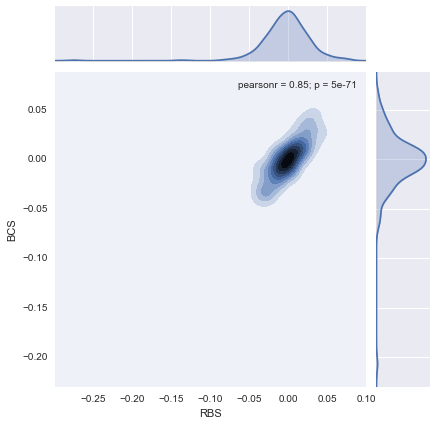

In [79]:
#comparing Barclays to RBS
sns.jointplot('RBS','BCS',banking_rets,kind='kdeplot')